# Velocidade da partícula
$\DeclareMathOperator{\sen}{sen}$
$\DeclareMathOperator{\senh}{senh}$
As componentes da velocidade da partícula é dada por: 

$$\left\{\begin{aligned}
    &u = \zeta_a \omega \dfrac{\cosh[k(h+z)]}{\senh(kh)} \cos(kx-\omega t) \\
    &w = \zeta_a \omega \dfrac{\senh[k(h+z)]}{\senh(kh)} \sen(kx-\omega t) \\
\end{aligned}\right.$$

Em águas profundas podemos resumir essas equações para: 

$$\left\{\begin{aligned}
    &u = \zeta_a \omega e^{kz} \cos(kx-\omega t) \\
    &w = \zeta_a \omega e^{kz} \sen(kx-\omega t)\\
\end{aligned}\right.$$

Em águas profundas: 

$$V = \sqrt{u^2+w^2} = \zeta_a \omega e^{kz}$$

Portanto, a velocidade máxima será em $z=0$, já que $e^{kz}$ fica cada vez menor quando a profundidade aumenta, pois $z$ é positivo pra cima, logo para $\zeta_a = 3 \;m$ e $\lambda=200 \;m$ ($k=0.031\;rad/m$):

$$\omega = \sqrt{kg} = 0.551 \; rad/s$$
$$V_{m\acute{a}x} = (3)(0.551) = 1.653 \; m/s$$

Em águas intermediárias: 

$$V = \sqrt{u^2+w^2} = \sqrt{ \left[\zeta_a \omega \dfrac{\cosh[k(h+z)]}{\senh(kh)} \cos(kx-\omega t)\right]^2 + \left[\zeta_a \omega \dfrac{\senh[k(h+z)]}{\senh(kh)} \sen(kx-\omega t)\right]^2} $$


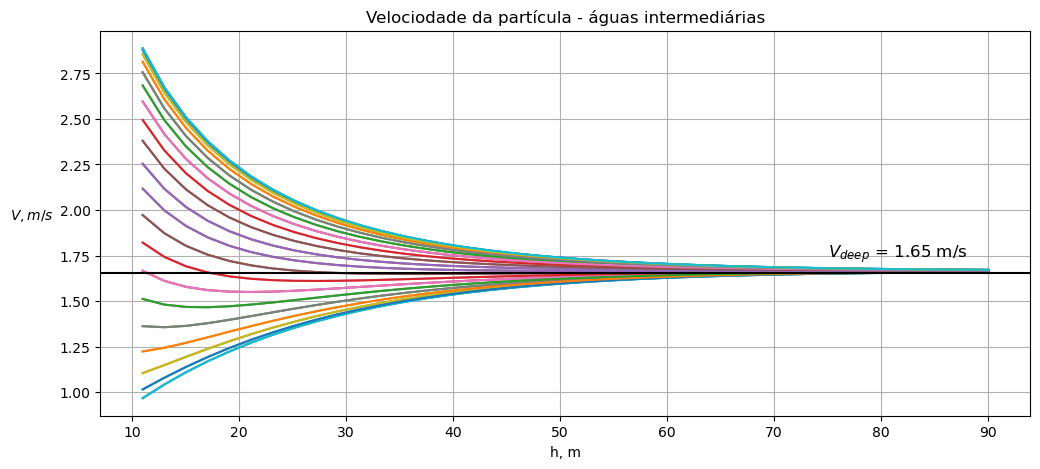

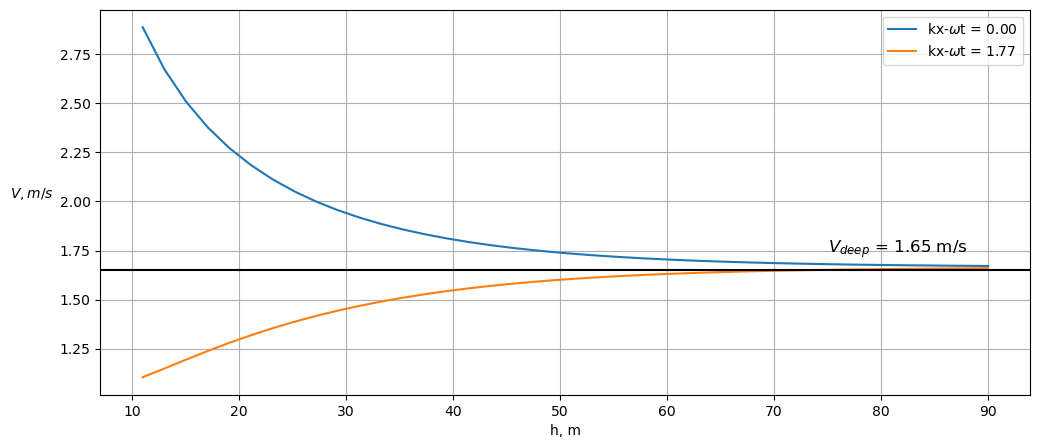

In [123]:
import numpy as np
from matplotlib import pyplot as plt
L  = 200                       # Comprimento da onda, m
A  = 3                         # Amplitude da onda, m
g  = 9.81                      # Aceleração da gravidade, m/s²
z  = 0                         # Profundidade média da partícula, m
k  = 2*np.pi/L                 # Número de onda, rad/m
h1 = 0.9*0.5*L                 # Limite de profundidade máximo para águas profundas, m 
h2 = 1.1*0.05*L                # Limite de profundidade mínimo para águas rasas, m          
N  = 40                        # Número de pontos/profundidades 
h  = np.linspace(h2, h1, N)    # Vetor de profundidades, m
w  = np.sqrt(k*g*np.tanh(k*h)) # Vetor de frequências angulares, rad/s
kx_wt = np.linspace(0, 
                    2*np.pi, 
                    N)         # Vetor de radianos percorridos, rad
V_p = 1.653                    # Velocidade máx. em águas profundas p/z=0, m/s

fig, ax = plt.subplots(figsize=(12, 5))
V=[]
for n in range(len(kx_wt)):
    V.append(np.sqrt(((A*w)*(np.cosh(k*(h+z))/np.sinh(k*h))*np.cos(kx_wt[n]))**2 +
                     ((A*w)*(np.sinh(k*(h+z))/np.sinh(k*h))*np.sin(kx_wt[n]))**2))
    ax.plot(h, V[n])

ax.grid()
ax.annotate(r'$V_{{deep}}$ = {c:.2f} m/s'.format(c=V_p), 
            xy=(10, 2), 
            xytext=(75, 1.05*V_p), 
            fontsize=12)
plt.axhline(y = V_p, color = 'k', linestyle = '-')
plt.ylabel(r'$V, m/s$', rotation=0, labelpad=20)
plt.xlabel('h, m')
plt.title('Velociodade da partícula - águas intermediárias')

fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.plot(h, V[0], label=r'kx-$\omega$t = {kxwt:.2f}'.format(kxwt=kx_wt[0]))
ax2.plot(h, V[11], label=r'kx-$\omega$t = {kxwt:.2f}'.format(kxwt=kx_wt[11]))
plt.axhline(y = V_p, color = 'k', linestyle = '-')
ax2.legend()
ax2.grid()
ax2.annotate(r'$V_{{deep}}$ = {c:.2f} m/s'.format(c=V_p), 
            xy=(10, 2), 
            xytext=(75, 1.05*V_p), 
            fontsize=12)
plt.ylabel(r'$V, m/s$', rotation=0, labelpad=20)
plt.xlabel('h, m')
plt.show()

Como podemos observar acima, a depender da profundidade, teremos diferentes máximos para profundidade, porém em todos os casos, ela sempre ocorre quando $\cos(kx-\omega t) = 1$ e $\sen(kx-\omega t) = 0$, ou seja, quando $kx-\omega t = 2n\pi$. É possível observar a convergência para o valor em águas profundas: $V \approx 1.65 \;m/s$. 